# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import keras
from keras import layers
from keras.utils import np_utils, get_file
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, OneClassSVM 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.utils import shuffle

Using TensorFlow backend.


### Utilities

In [2]:
def show_results(y_true,y_pred):
    print('=============Results=============')
    print("Accuracy => ", metrics.accuracy_score(y_true, y_pred))
    print("Precision => ",metrics.precision_score(y_true, y_pred))
    print('Mean Absolute Error =>', metrics.mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error =>', metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error =>', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print('Classification Matrix :')
    print(confusion_matrix(y_true,y_pred))
    print('Classification Report :')
    print(classification_report(y_true,y_pred))
    print('=================================')

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [3]:
dataDir = 'data/data.csv' # remove before push
data = pd.read_csv(dataDir)

best_columns = ['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure']

X = data[best_columns]
y = data[['sensors.classification']]

print(X.shape)
print(y.shape)

#sklearn para dividir os dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123) #shuffle=true by default

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1973, 6)
(1973, 1)
(1381, 6)
(592, 6)
(1381, 1)
(592, 1)


(1490, 7)
(483, 7)


Normal Situation captures:  1490
Anomalous Situation captures:  483


       sensors.pm25  sensors.pm10  sensors.temperature   sensors.gas  \
count    483.000000    483.000000           483.000000    483.000000   
mean     474.276398    867.980331            18.129728  27181.109731   
std      220.230173    481.765352             2.034277  11719.845209   
min      158.000000    208.000000            11.200313   3841.000000   
25%      263.900000    537.300000            17.164961  19557.500000   
50%      465.300000    734.100000            18.286641  26584.000000   
75%      618.200000   1209.800000            19.437617  32983.000000   
max      999.900000   1999.900000            22.019648  69055.000000   

       sensors.humidity  sensors.pressure  sensors.classification  
count        483.000000        483.000000                   483.0  
mean          60.692039       1008.517489                     1.0  
std            5.199220          9.336680               

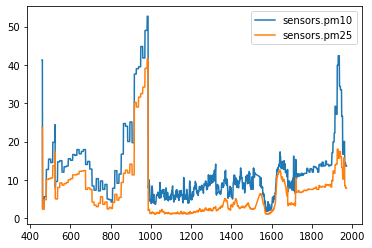

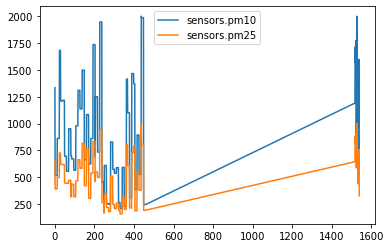

In [4]:
#Observação de dados
x0 = data.loc[data['sensors.classification'] == 0]
x1 = data.loc[data['sensors.classification'] == 1]


print(x0.shape)
print(x1.shape)
print('\n')

print("Normal Situation captures: ", x0.shape[0])
print("Anomalous Situation captures: ", x1.shape[0])
print('\n')

x0.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

x1.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

print(x1.describe())

## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"

#### SVM (Best Kernel)

In [20]:
# Prepare multiple classifiers with diferent kernels

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=6, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [21]:
# Train and Test each of the kernels
for i in range(4):
    svn = getClassifier(i)
    svn.fit(X_train, y_train.values.ravel())
    svn_y_pred = svn.predict(X_test)
    print('<<<<<<<<')
    print("Algorithm: SVM")
    print("Evaluation:", kernels[i], "kernel")
    show_results(y_test,y_pred=svn_y_pred)
    print('>>>>>>>>')
    print('\n')

<<<<<<<<
Algorithm: SVM
Evaluation: Polynomial kernel
=============Results=============
Accuracy =>  0.23817567567567569
Precision =>  0.23817567567567569
Mean Absolute Error => 0.7618243243243243
Mean Squared Error => 0.7618243243243243
Root Mean Squared Error => 0.8728254833151495
Classification Matrix :
[[  0 451]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.24      1.00      0.38       141

    accuracy                           0.24       592
   macro avg       0.12      0.50      0.19       592
weighted avg       0.06      0.24      0.09       592

>>>>>>>>


<<<<<<<<
Algorithm: SVM
Evaluation: RBF kernel
=============Results=============
Accuracy =>  0.7618243243243243
Precision =>  0.0
Mean Absolute Error => 0.23817567567567569
Mean Squared Error => 0.23817567567567569
Root Mean Squared Error => 0.48803245350660407
Classification Matrix :
[[451   0]
 [141   0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages

<<<<<<<<
Algorithm: SVM
Evaluation: Linear kernel
=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592

>>>>>>>>




#### SVM Parameter Tuning - GridSearch

#### b. Model Trainig

In [22]:
#Implementing SVM with Grid Search for parameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train.values.ravel())
print('Best parameters => ', grid.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters =>  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


#### c. Output results

In [23]:
# Predition of the test sample
grid_pred = grid.predict(X_test)

In [24]:
show_results(y_true=y_test,y_pred=grid_pred)

=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



#### d. Model Saving 

In [10]:
# Save the result of the gridsearch model which is the best

filename = 'model_saves/svm_gridsearch.sav'
pickle.dump(grid, open(filename, 'wb'))

### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

In [25]:
num_classes = 1 # Number of classes right now (0-Normal,1-smoke)
y_train_nn = np.asarray(y_train)
y_test_nn = np.asarray(y_test)
print(X_train.shape)

(1381, 6)


#### b. Model Train and Results

In [26]:
# Model Build
nn = keras.Sequential()

nn.add(layers.Dense(128,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(16,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(num_classes,activation='sigmoid'))

# Model Compile
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.build()

# Model Summary
print(nn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# Model Training 
epochs = 20
batch_size = 16
nn.fit(X_train, y_train_nn, validation_data = (X_test, y_test_nn), epochs = epochs, verbose = 2)

Train on 1381 samples, validate on 592 samples
Epoch 1/20
 - 0s - loss: 16.9204 - accuracy: 0.7697 - val_loss: 1.6793 - val_accuracy: 0.9324
Epoch 2/20
 - 0s - loss: 0.4224 - accuracy: 0.9631 - val_loss: 0.5194 - val_accuracy: 0.8480
Epoch 3/20
 - 0s - loss: 4.4450 - accuracy: 0.8783 - val_loss: 7.8132 - val_accuracy: 0.8767
Epoch 4/20
 - 0s - loss: 8.0128 - accuracy: 0.8762 - val_loss: 1.1124 - val_accuracy: 0.9274
Epoch 5/20
 - 0s - loss: 0.5854 - accuracy: 0.9754 - val_loss: 0.7205 - val_accuracy: 0.9814
Epoch 6/20
 - 0s - loss: 0.6533 - accuracy: 0.9703 - val_loss: 0.7836 - val_accuracy: 0.9814
Epoch 7/20
 - 0s - loss: 0.7537 - accuracy: 0.9616 - val_loss: 0.4369 - val_accuracy: 0.9865
Epoch 8/20
 - 0s - loss: 0.5327 - accuracy: 0.9819 - val_loss: 0.4565 - val_accuracy: 0.9882
Epoch 9/20
 - 0s - loss: 0.8782 - accuracy: 0.9573 - val_loss: 1.1939 - val_accuracy: 0.9713
Epoch 10/20
 - 0s - loss: 0.3504 - accuracy: 0.9776 - val_loss: 0.3257 - val_accuracy: 0.9916
Epoch 11/20
 - 0s - l

In [28]:
# model testing
nn_y_pred = nn.predict(X_test).round()
print(nn_y_pred[:,0])

[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.

In [14]:
print("Algorithm: Keras Neural Network")
show_results(y_true=y_test,y_pred=nn_y_pred)

Algorithm: Keras Neural Network
=============Results=============
Accuracy =>  0.23817567567567569
Precision =>  0.23817567567567569
Mean Absolute Error => 0.7618243243243243
Mean Squared Error => 0.7618243243243243
Root Mean Squared Error => 0.8728254833151495
Classification Matrix :
[[  0 451]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.24      1.00      0.38       141

    accuracy                           0.24       592
   macro avg       0.12      0.50      0.19       592
weighted avg       0.06      0.24      0.09       592



/Users/tiagofontes/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### b. Model Train and Results - sklearn

In [32]:
sklNN = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='relu', solver='adam', max_iter=10000)
sklNN.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 6, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
sklNN_y_pred = sklNN.predict(X_test)
print(sklNN_y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 

In [34]:
print("Algorithm: SK-Learn Neural Network")
show_results(y_true=y_test,y_pred=sklNN_y_pred)

Algorithm: SK-Learn Neural Network
=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



#### d. Model Saving 

In [19]:
#Neural Network implementada
filename = 'model_saves/nn.hdf5'
#pickle.dump(nn, open(filename, 'wb'))
nn.save(filename)

In [44]:
#Neural Network sklearn
filename = 'model_saves/sklearn_nn.sav'
pickle.dump(sklNN, open(filename, 'wb'))

### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [35]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### c. Output results

In [36]:
gaussNB_y_pred = gaussNB.predict(X_test)
print(gaussNB_y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 

In [37]:
print("Algorithm: Naive Bayes")
show_results(y_true=y_test,y_pred=gaussNB_y_pred)

Algorithm: Naive Bayes
=============Results=============
Accuracy =>  0.9780405405405406
Precision =>  0.9155844155844156
Mean Absolute Error => 0.02195945945945946
Mean Squared Error => 0.02195945945945946
Root Mean Squared Error => 0.14818724459095478
Classification Matrix :
[[438  13]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       451
           1       0.92      1.00      0.96       141

    accuracy                           0.98       592
   macro avg       0.96      0.99      0.97       592
weighted avg       0.98      0.98      0.98       592



#### d. Model Saving 

In [48]:
filename = 'model_saves/gaussNB.sav'
pickle.dump(gaussNB, open(filename, 'wb'))

### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [4]:
#Instanciar o modelo com x decision trees
randForestReg = RandomForestClassifier(n_estimators = 50, random_state = 0) #random_state: "the results will be the same each time I run the split for reproducible results"

#Treinar o modelo
randForestReg.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### c. Output results

In [5]:
# Predictions in test dataset
randForestReg_y_pred = randForestReg.predict(X_test)
print(randForestReg_y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 

In [6]:
print("Algorithm: Random Forest")
show_results(y_true=y_test,y_pred=randForestReg_y_pred)

Algorithm: Random Forest
=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



#### d. Model Saving 

In [7]:
filename = 'model_saves/randomforest.sav'
pickle.dump(randForestReg, open(filename, 'wb'))

## 4. Unsupervised Learning
Nota: Nestes casos não existe 'classificação' por serem modelos não supervisionados

### 4.1 Algoritmo "K-means clustering"

#### a. Data preparation for input

#### b. Model Trainig

In [53]:
n_clusters = 2
kmeans = KMeans(algorithm = 'auto', init = 'k-means++', max_iter = 1000000, n_init= 10, n_clusters = n_clusters, verbose = 0) #Para já vou colocar 2, de existência e não existência de fumo
kmeans.fit(X_train)

KMeans(max_iter=1000000, n_clusters=2)

#### c. Output results

In [54]:
kmeans_clusters = kmeans.cluster_centers_
print('Cluster Centers  => ', kmeans_clusters)
print('Train labels => ', kmeans.labels_)

Cluster Centers  =>  [[2.51155519e+02 4.55648701e+02 2.07922923e+01 2.85971737e+04
  5.17678703e+01 1.00674715e+03]
 [2.63228758e+01 5.39124183e+01 1.90760082e+01 5.79654536e+04
  5.20362909e+01 9.82489199e+02]]
Train labels =>  [1 0 1 ... 1 1 0]


In [55]:
kmeans_labels_test = kmeans.predict(X_test)
print('Test labels => ',kmeans_labels_test)

Test labels =>  [0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1
 1 0 1 0 

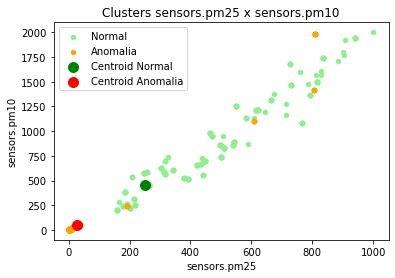

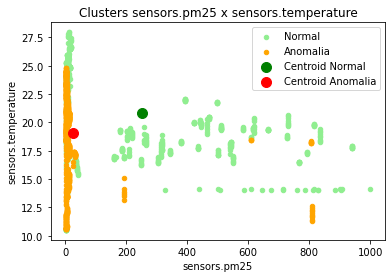

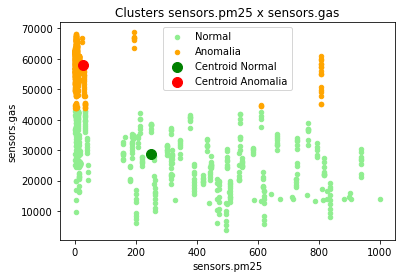

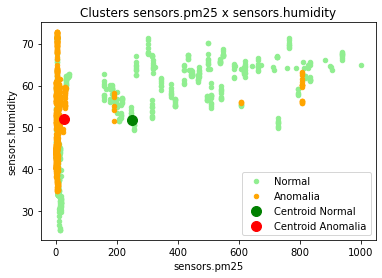

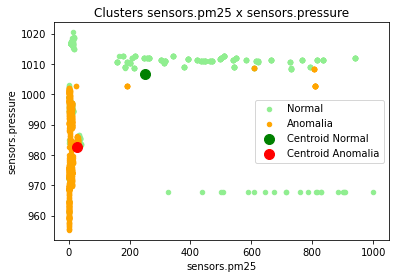

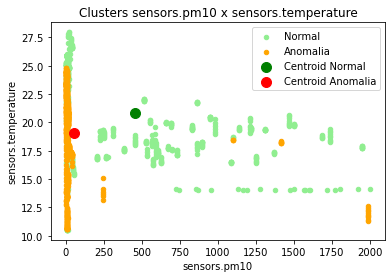

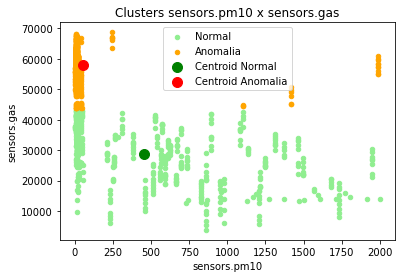

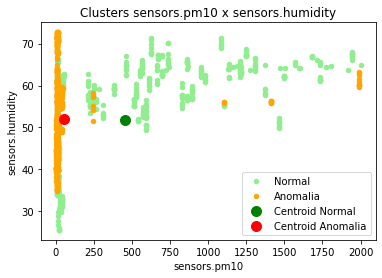

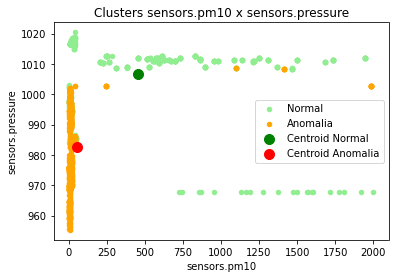

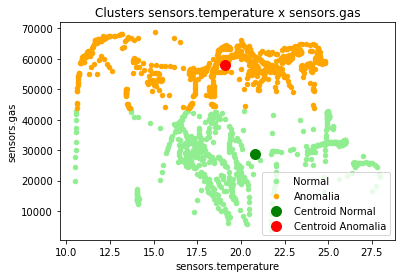

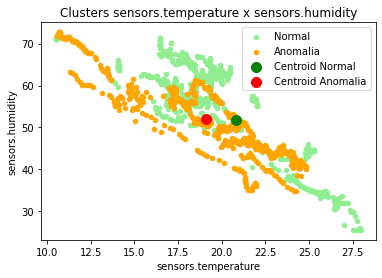

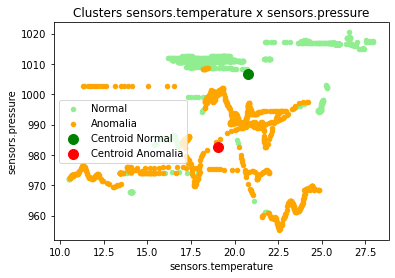

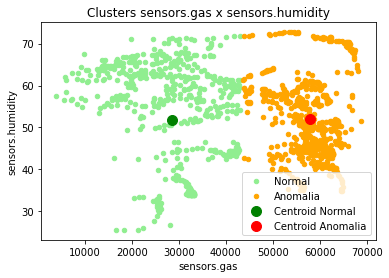

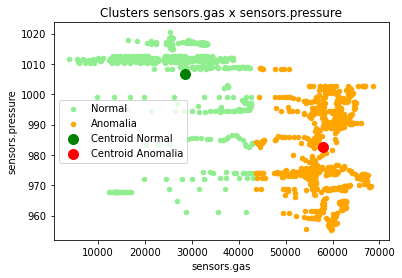

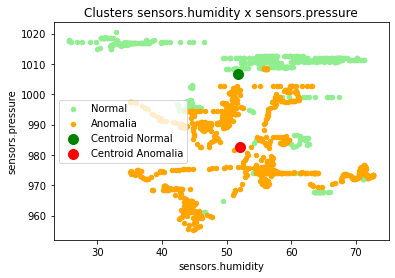

In [56]:
#Labels
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if( c1 >= c2):
            ;
        else:
            plt.scatter(X_train[kmeans.labels_ == 0][col1], X_train[kmeans.labels_ == 0][col2], s = 20, c = 'lightgreen', label = 'Normal')
            plt.scatter(X_train[kmeans.labels_ == 1][col1], X_train[kmeans.labels_ == 1][col2], s = 20, c = 'orange', label = 'Anomalia')
            plt.scatter(kmeans_clusters[0, c1], kmeans_clusters[0, c2], s=100, c='green', label = 'Centroid Normal')
            plt.scatter(kmeans_clusters[1, c1], kmeans_clusters[1, c2], s=100, c='red', label = 'Centroid Anomalia')
            plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend()
            plt.show()

In [57]:
#Métricas para os dados de treino
print("Algorithm: K-Means Clustering")
print('Training data Accuracy :')
show_results(y_true=y_train,y_pred=kmeans.labels_)


Algorithm: K-Means Clustering
Training data Accuracy :
=============Results=============
Accuracy =>  0.2346125995655322
Precision =>  0.032679738562091505
Mean Absolute Error => 0.7653874004344677
Mean Squared Error => 0.7653874004344677
Root Mean Squared Error => 0.8748642182844534
Classification Matrix :
[[299 740]
 [317  25]]
Classification Report :
              precision    recall  f1-score   support

           0       0.49      0.29      0.36      1039
           1       0.03      0.07      0.05       342

    accuracy                           0.23      1381
   macro avg       0.26      0.18      0.20      1381
weighted avg       0.37      0.23      0.28      1381



In [58]:
# Previsoes dados de teste
print("Algorithm: K-Means Clustering")
print('Test data Accuracy :')
show_results(y_true=y_test,y_pred=kmeans_labels_test)

Algorithm: K-Means Clustering
Test data Accuracy :
=============Results=============
Accuracy =>  0.22297297297297297
Precision =>  0.026706231454005934
Mean Absolute Error => 0.777027027027027
Mean Squared Error => 0.777027027027027
Root Mean Squared Error => 0.8814913652594828
Classification Matrix :
[[123 328]
 [132   9]]
Classification Report :
              precision    recall  f1-score   support

           0       0.48      0.27      0.35       451
           1       0.03      0.06      0.04       141

    accuracy                           0.22       592
   macro avg       0.25      0.17      0.19       592
weighted avg       0.37      0.22      0.27       592



#### d. Model Saving 

In [59]:
filename = 'model_saves/kmeans.sav'
pickle.dump(kmeans, open(filename, 'wb'))

### 4.2 Algoritmo "Local Outlier factor"

#### a. Data preparation for input

In [8]:
data0 = data[data['sensors.classification'] == 0]
data1 = data[data['sensors.classification'] == 1]
data1 = data1[data1['sensors.pm25'] >=400]
data1 = data1[:40]
contamination = data1.shape[0]/(data1.shape[0] + data0.shape[0])
lofDataset = shuffle(data0.append(data1))
Y_LofData = lofDataset['sensors.classification']
X_LofData = lofDataset.drop(['sensors.classification'],axis=1)
print(contamination)

0.026143790849673203


#### b. Model Trainig

In [9]:
n_neighbors = 100 # no sklearn diz que 20 é no geral um valor bom, mas podemos otimizar depois
metric = 'minkowski' #Euclid, Minkowski, Manhattan

localOutFact = LocalOutlierFactor(n_neighbors = n_neighbors, metric = metric, contamination = contamination)

In [10]:
# fit predict with train data
lof_train_pred = localOutFact.fit_predict(X_LofData)
#lof_test_pred = localOutFact.fit_predict(X_test)
print(lof_train_pred) #1 - inlier / -1 outlier

[1 1 1 ... 1 1 1]


#### c. Output results

In [11]:
#Notas:
#LOF(k) ~ 1 means Similar density as neighbors.
#LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
#LOF(k) > 1 means Lower density than neighbors (Outlier)
#Filtro dos outliers (valores negativos)
lof_OutId = np.where(lof_train_pred < 0)
lof_OutVal = X_LofData.iloc[lof_OutId]
print("----------------------------------------")
print(lof_OutId)
print("----------------------------------------")

----------------------------------------
(array([  92,   97,  152,  226,  237,  242,  270,  287,  322,  344,  360,
        378,  476,  506,  550,  551,  574,  577,  585,  587,  658,  681,
        734,  764,  777,  842,  843,  857, 1001, 1132, 1238, 1312, 1371,
       1388, 1431, 1444, 1451, 1466, 1495, 1518]),)
----------------------------------------


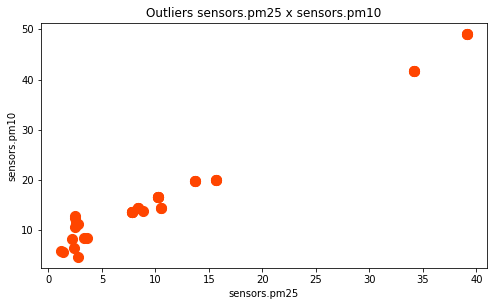

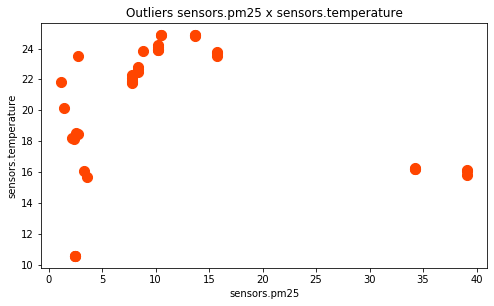

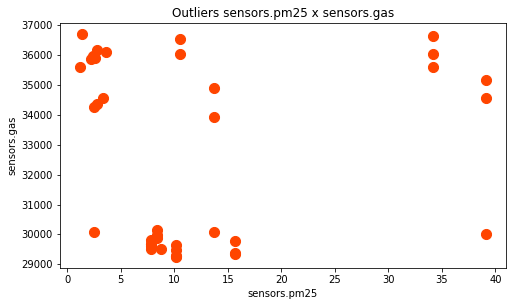

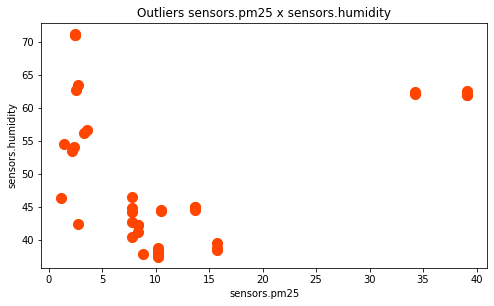

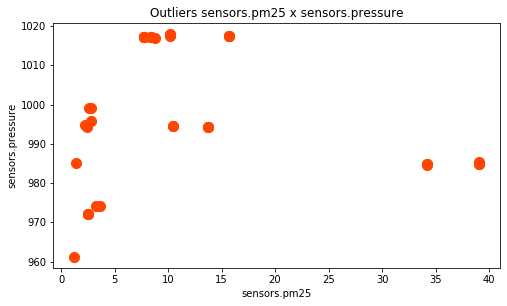

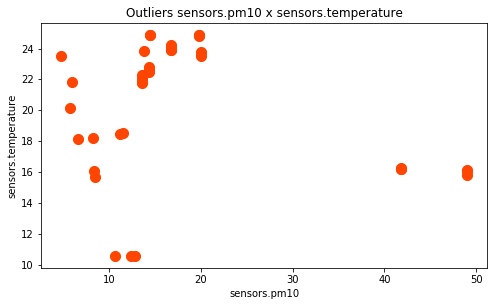

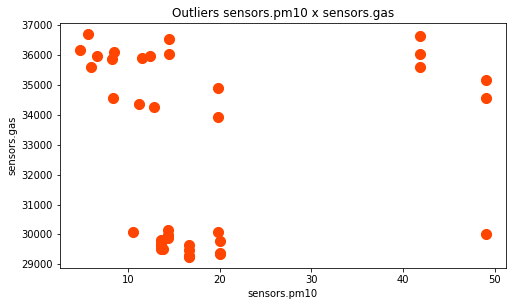

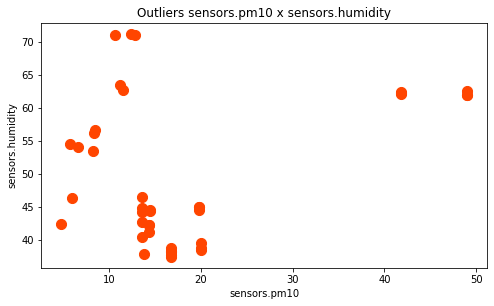

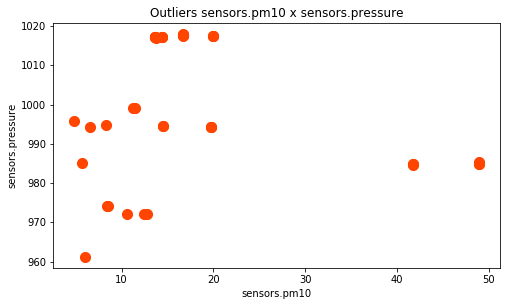

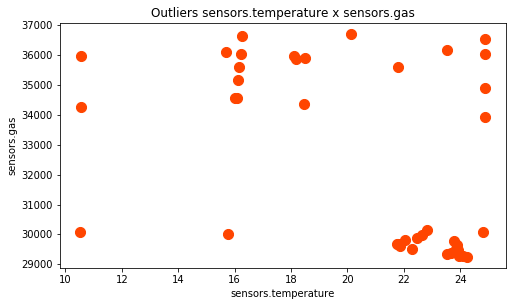

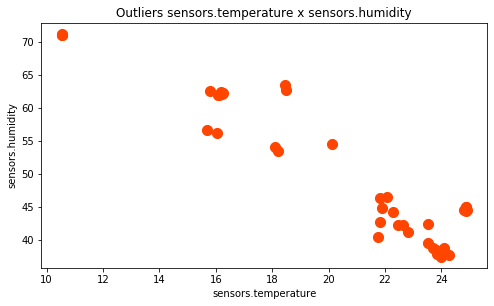

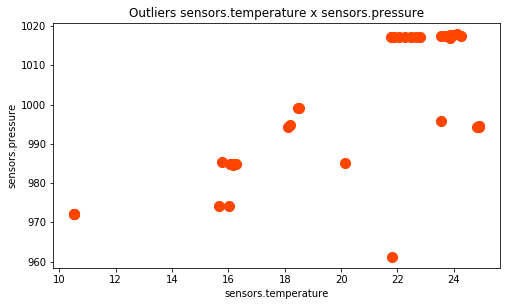

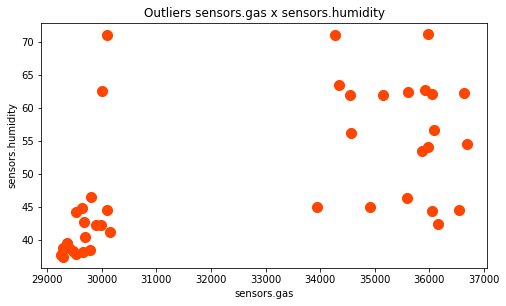

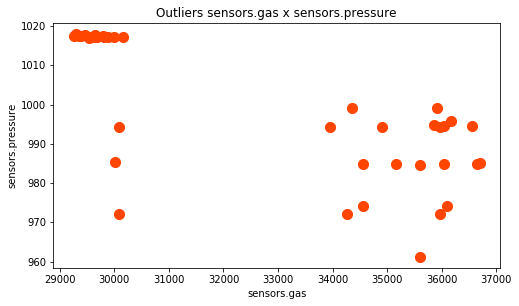

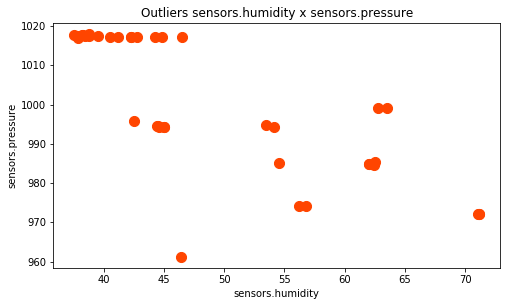

In [12]:
#Plot dos dados
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if (c1 >= c2):
            ;
        else:
            plt.figure(figsize=(8,4.5))
            plt.title('Outliers ' + str(col1) + ' x ' + str(col2))
            #plt.scatter(X_LofData[col1], X_LofData[col2], s = 100, c = 'lightgreen', label = 'Normal')
            plt.scatter(lof_OutVal[col1],lof_OutVal[col2], s = 102, c = 'orangered', label = 'Anomalias')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [13]:
#Substituição dos valores normais e anomalias por 0 e 1
lof_train_pred[lof_train_pred == 1] = 0
lof_train_pred[lof_train_pred == -1] = 1

show_results(y_true=Y_LofData,y_pred=lof_train_pred)

=============Results=============
Accuracy =>  0.9477124183006536
Precision =>  0.0
Mean Absolute Error => 0.05228758169934641
Mean Squared Error => 0.05228758169934641
Root Mean Squared Error => 0.2286647801900118
Classification Matrix :
[[1450   40]
 [  40    0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1490
           1       0.00      0.00      0.00        40

    accuracy                           0.95      1530
   macro avg       0.49      0.49      0.49      1530
weighted avg       0.95      0.95      0.95      1530



#### d. Model Saving 

In [66]:
filename = 'model_saves/lof.sav'
pickle.dump(localOutFact , open(filename, 'wb'))

### 4.3 Algoritmo "Isolation Forest"

#### a. Data preparation for input

In [14]:
isodata = data
train, test = train_test_split(isodata, test_size=.2) 
train_normal = train[train['sensors.classification']==0] 
train_outliers = train[(train['sensors.classification']==1)]
outlier_prop = len(train_outliers) / len(train_normal)
train_y = train_normal['sensors.classification']
train_normal = train_normal.drop('sensors.classification',axis=1)
test_y = test['sensors.classification']
test = test.drop('sensors.classification',axis=1)
outlier_prop

0.3327702702702703

#### b. Model Trainig

In [15]:
isoForest = IsolationForest(n_estimators = 64, max_samples = 'auto', contamination = outlier_prop, max_features = 3, behaviour = 'new')
#n_estimatores = 100 por default; max_features = "It is the number of features to draw from the total features to train each base estimator or tree"
isoForest.fit(train_normal)

scores = isoForest.decision_function(train_normal)

#### c. Output results

In [16]:
#y_pred_train = model.predict(X_train)
isoForest_y_pred = isoForest.predict(test)

#print(y_pred_train) #anomalias = -1
print(isoForest_y_pred)

[ 1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1
 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1
 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1  1 -1
  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1 -1
 -1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1  1
 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1
  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1  1
 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1
 -1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1
 -1  1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1 -1

(array([  3,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  17,  21,
        24,  26,  28,  29,  34,  38,  39,  40,  47,  48,  49,  50,  52,
        54,  57,  58,  62,  65,  67,  68,  70,  71,  72,  73,  75,  76,
        79,  80,  82,  83,  85,  86,  88,  89,  93,  95,  99, 100, 102,
       103, 104, 105, 106, 107, 110, 111, 114, 115, 116, 117, 118, 119,
       120, 122, 123, 124, 125, 129, 131, 134, 135, 136, 138, 140, 143,
       144, 145, 147, 149, 150, 152, 155, 157, 158, 160, 161, 163, 167,
       168, 169, 171, 176, 179, 180, 185, 186, 189, 192, 193, 197, 202,
       203, 204, 205, 210, 212, 213, 219, 223, 226, 227, 229, 232, 234,
       235, 236, 240, 243, 245, 247, 249, 250, 251, 256, 257, 260, 261,
       262, 263, 264, 265, 269, 270, 272, 273, 275, 277, 278, 279, 283,
       287, 288, 290, 292, 295, 296, 298, 299, 301, 303, 304, 307, 308,
       309, 310, 312, 314, 315, 316, 317, 319, 322, 325, 328, 331, 332,
       333, 335, 338, 343, 344, 345, 347, 349, 355, 356, 357, 3

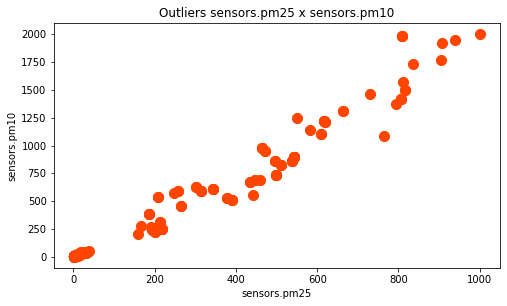

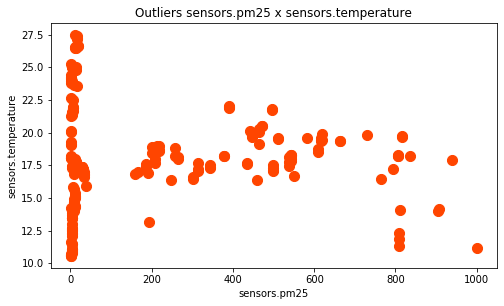

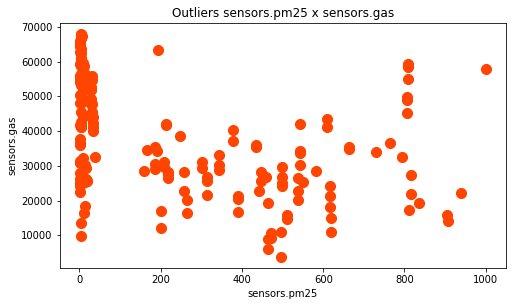

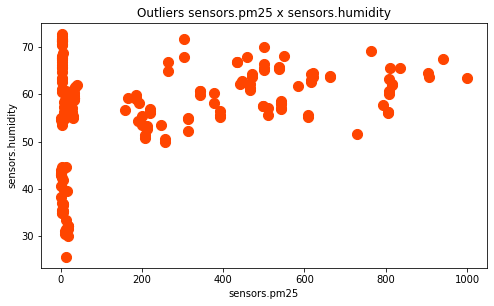

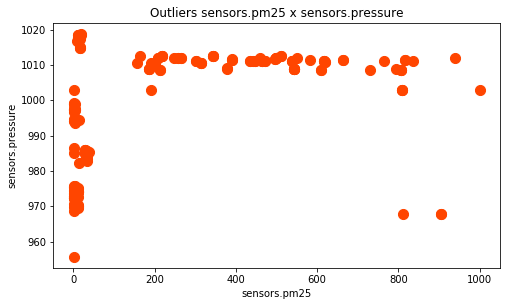

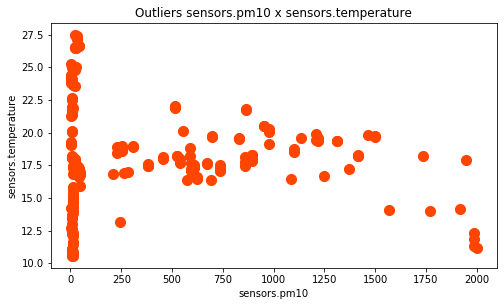

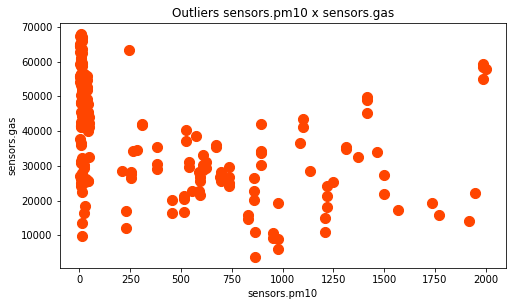

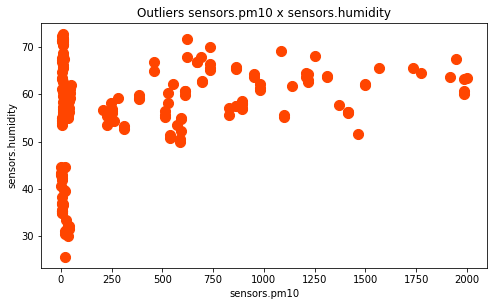

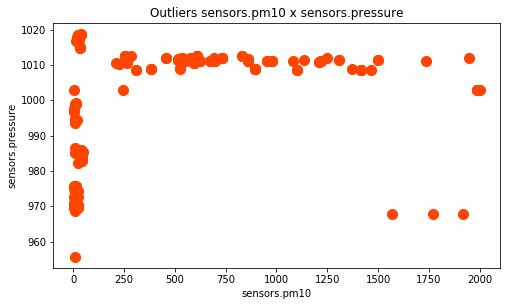

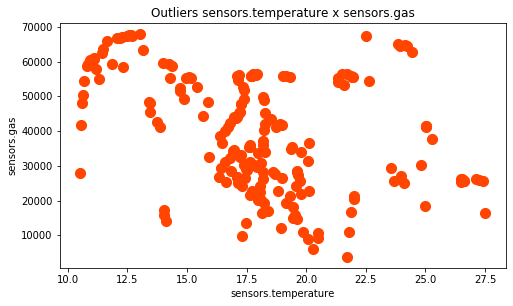

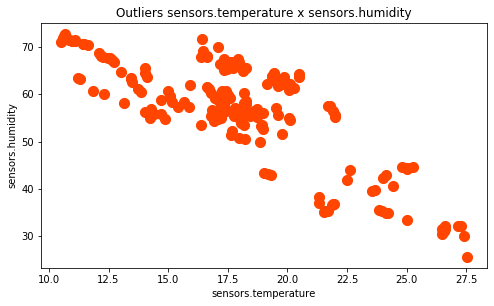

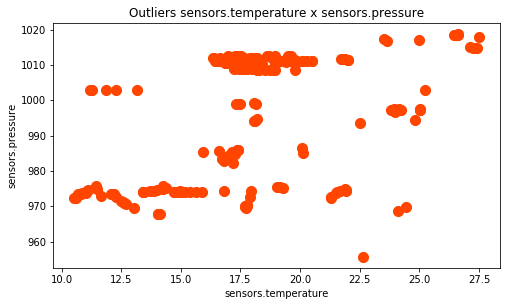

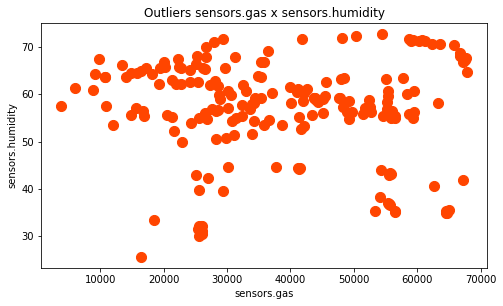

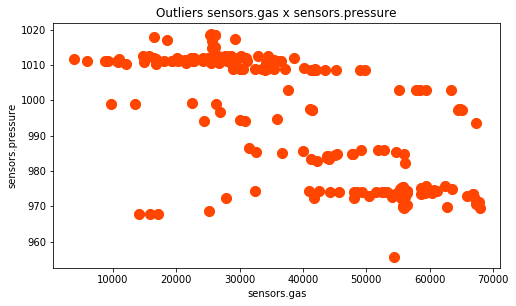

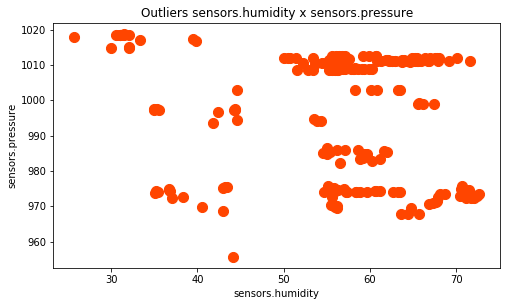

In [17]:
#Anomalias
isoForest_OutIdx = np.where(isoForest_y_pred == -1)
isoForest_OutVal = test.iloc[isoForest_OutIdx]

print(isoForest_OutIdx)

#Plot Outliers Values
for c1, col1 in enumerate(train_normal.columns):
    for c2, col2 in enumerate(train_normal.columns):
        if (c1 >= c2):
            ;
        else:
            plt.figure(figsize=(8,4.5))
            plt.title('Outliers ' + str(col1) + ' x ' + str(col2))
            #plt.scatter(test[col1], test[col2], s = 100, c = 'lightgreen', label = 'Normal')
            plt.scatter(isoForest_OutVal[col1],isoForest_OutVal[col2], s = 102, c = 'orangered', label = 'Anomalias')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [18]:
#Substituição dos valores normais e anomalias por 0 e 1
isoForest_y_pred[isoForest_y_pred == 1] = 0
isoForest_y_pred[isoForest_y_pred == -1] = 1

#Métricas aplicadas aos dados de teste (X_test)
show_results(y_true=test_y,y_pred=isoForest_y_pred)

=============Results=============
Accuracy =>  0.7113924050632912
Precision =>  0.43842364532019706
Mean Absolute Error => 0.28860759493670884
Mean Squared Error => 0.28860759493670884
Root Mean Squared Error => 0.5372221095010041
Classification Matrix :
[[192 114]
 [  0  89]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       306
           1       0.44      1.00      0.61        89

    accuracy                           0.71       395
   macro avg       0.72      0.81      0.69       395
weighted avg       0.87      0.71      0.73       395



#### d. Model Saving 

In [72]:
filename = 'model_saves/isolationforest.sav'
pickle.dump(isoForest, open(filename, 'wb'))

### 4.4 One Class SVM

#### a. Data preparation for input

In [73]:
train, test = train_test_split(data, test_size=.2) 
train_normal = train[train['sensors.classification']==0] 
train_outliers = train[(train['sensors.classification']==1)]
outlier_prop = len(train_outliers) / len(train_normal)
train_y = train_normal['sensors.classification']
train_normal = train_normal.drop('sensors.classification',axis=1)
test_y = test['sensors.classification']
test = test.drop('sensors.classification',axis=1)
outlier_prop

0.3282828282828283

#### b. Model Train

In [74]:
oneClassSVM = OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.00001,shrinking=False)
oneClassSVM.fit(train_normal)

OneClassSVM(gamma=1e-05, nu=0.3282828282828283, shrinking=False)

#### c. Output Results

Text(0, 0.5, 'pm10')

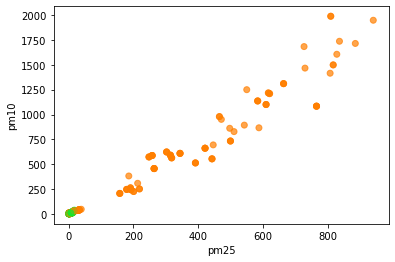

In [75]:
oneclassSVM_pred = oneClassSVM.predict(test)
oneclassSVM_pred[oneclassSVM_pred == 1] = 0
oneclassSVM_pred[oneclassSVM_pred == -1] = 1
colors = np.array(['#18e52a', '#ff7f00']) 
plt.scatter(test['sensors.pm25'] , test['sensors.pm10'] , alpha=0.7, c=colors[oneclassSVM_pred])
plt.xlabel('pm25') 
plt.ylabel('pm10')

In [76]:
show_results(test_y,oneclassSVM_pred)

=============Results=============
Accuracy =>  0.6835443037974683
Precision =>  0.42660550458715596
Mean Absolute Error => 0.31645569620253167
Mean Squared Error => 0.31645569620253167
Root Mean Squared Error => 0.562543950463012
Classification Matrix :
[[177 125]
 [  0  93]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       302
           1       0.43      1.00      0.60        93

    accuracy                           0.68       395
   macro avg       0.71      0.79      0.67       395
weighted avg       0.86      0.68      0.71       395



#### d. Model Saving

In [77]:
filename = 'model_saves/oneclasssvm.sav'
pickle.dump(oneClassSVM, open(filename, 'wb'))

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section

### Supervised algorithm

In [39]:
X_sample = X_test
Y_sample = y_test

In [40]:
supervisedModels = {'SVM-Grid': grid,
                    'NeuralNet-Keras' : nn,
                    'NeuralNet2-SKL' : sklNN,
                    'NaiveBayes' : gaussNB,
                    'RandForest' : randForestReg
                    }
accuracies = {}
precisions = {}
print('Model\t\t|     Accuracy\t|    Precision\t|')
print('----------------|--------------------------------')
for name,model in supervisedModels.items():
    tempPreds = model.predict(X_sample)
    tempAccuracy = metrics.accuracy_score(Y_sample, tempPreds.round())
    tempPrecision = metrics.precision_score(Y_sample, tempPreds.round())
    tempAccuracy =  round(tempAccuracy,2)
    tempPrecision = round(tempPrecision,2)
    accuracies[name] = tempAccuracy
    precisions[name] = tempPrecision
    print(name + '\t|\t' + str(tempAccuracy) + '\t|\t' + str(tempPrecision)+ '\t|')
    

Model		|     Accuracy	|    Precision	|
----------------|--------------------------------
SVM-Grid	|	1.0	|	1.0	|
NeuralNet-Keras	|	0.99	|	0.99	|
NeuralNet2-SKL	|	1.0	|	1.0	|
NaiveBayes	|	0.98	|	0.92	|
RandForest	|	1.0	|	1.0	|


### Unsupervised algorithms

In [82]:
unsupervisedModels = {'k-means-cluster': kmeans,
                    'isolationForest' : isoForest,
                    'oneClassSVN' : oneClassSVM
                    }
accuracies = {}
precisions = {}
print('Model\t\t|     Accuracy\t|    Precision\t|')
print('----------------|--------------------------------')
for name,model in unsupervisedModels.items():
    tempPreds = model.predict(X_sample)
    if (name == 'isolationForest') or (name == 'oneClassSVN'):
        tempPreds[tempPreds == 1] = 0
        tempPreds[tempPreds == -1] = 1
    tempAccuracy = metrics.accuracy_score(Y_sample, tempPreds)
    tempPrecision = metrics.precision_score(Y_sample, tempPreds)
    tempAccuracy =  round(tempAccuracy,2)
    tempPrecision = round(tempPrecision,2)
    accuracies[name] = tempAccuracy
    precisions[name] = tempPrecision
    print(name + '\t|\t' + str(tempAccuracy) + '\t|\t' + str(tempPrecision)+ '\t|')

Model		|     Accuracy	|    Precision	|
----------------|--------------------------------
k-means-cluster	|	0.22	|	0.03	|
isolationForest	|	0.75	|	0.49	|
oneClassSVN	|	0.71	|	0.45	|
